# 量化交易员的Python基础知识和可视化

#### by RainX

* 为什么是Python
* 一些基础的可视化demo

## 为什么是python


### Python , Guido von Rossum, 1991年

Python的框架已经确立。Python语言以对象为核心组织代码，支持多种编程范式，采用动态类型，自动进行内存回收。Python支持解释运行，并能调用C库进行拓展。

http://blog.jobbole.com/77656/

### Python有很多版本
* CPython  2,3
* Pypy
* JPython
* Cython
* RPython
* Jython
* IronPython

http://www.open-open.com/lib/view/open1380418623307.html

### 从工具上来看，按由业务到工程的顺序

``` EXCEL >> R >> Python >> Scala ```

http://www.cshinacloud.cn/show.aspx?id=23242&cid=12

### 科学计算软件 .. 工程，模拟..

* Matlab
* mathematica
* Maple
* scilab
* R

other:Sage Math, GNU Octave

http://orion.math.iastate.edu/keinert/talks/tools/tools_08.html

https://en.wikipedia.org/wiki/Comparison_of_numerical_analysis_software

### Python 语言的应用领域
* 科学计算 scipy
* 爬虫 scrapy
* 数据挖掘，机器学习和自然语言处理 scikit-learn, libsvm , nltk
* web django , Tornado…... Flask
* 游戏.. Python Embeded , Cocos2D，PyGame, Panda3d...
* 生物学 bioPython
* 经济学 talib - c库的封装
* 数据可视化 matplotlab, seaborn
* GUI: PyQT, PyGTK,wxPython, (SublimeText, Blender3D)

### 量化常用的Python库和工具

* Jupyter(iPython Notebook)
* Scipy( Numpy, Pandas, Scipy, sympy, matplotlib)
* seaborn
* pyalgotrade

* Zipline: Zipline is a Pythonic algorithmic trading library. It is an event-driven system that supports both backtesting and live-trading.
* blaze: NumPy and Pandas interface to Big Data
* pyfolio: pyfolio is a Python library for performance and risk analysis of financial portfolios developed by Quantopian Inc.

https://www.zhihu.com/question/28557233/answer/41931051

## 一些基础的可视化Demo

### numpy 示例

In [4]:
import numpy as np
new_arr = np.random.randn(10)
new_arr

array([-0.975335  , -0.02267764,  2.08228286, -0.84319996,  0.64947301,
        2.83633017, -1.42835965,  0.10455945,  0.75386484, -0.86083534])

In [5]:
new_arr[:2]

array([-0.975335  , -0.02267764])

In [8]:
new_arr=new_arr.reshape(2,5)
new_arr

array([[-0.975335  , -0.02267764,  2.08228286, -0.84319996,  0.64947301],
       [ 2.83633017, -1.42835965,  0.10455945,  0.75386484, -0.86083534]])

In [9]:
new_arr[1]

array([ 2.83633017, -1.42835965,  0.10455945,  0.75386484, -0.86083534])

In [12]:
new_arr = new_arr+1
new_arr

array([[ 0.024665  ,  0.97732236,  3.08228286,  0.15680004,  1.64947301],
       [ 3.83633017, -0.42835965,  1.10455945,  1.75386484,  0.13916466]])

### Pandas示例

In [14]:
import pandas as pd
new_df = pd.DataFrame(new_arr, columns=['a', 'b', 'c', 'd', 'e'], index=pd.date_range(start='20150101', end='20150102') )
new_df

,a,b,c,d,e
2015-01-01,0.024665,0.977322,3.082283,0.156800,1.649473
2015-01-02,3.836330,-0.428360,1.104559,1.753865,0.139165


In [17]:
def p2f(x):
    return float(x.strip('%'))/100
data =pd.read_csv('SSBZ3M.csv', date_parser=[0],converters={3: p2f, 7:p2f, 9:p2f, 11:p2f, 13:p2f,'持仓占比':p2f}, encoding='gbk')
data[:2]

,日期,净值,总资产,收益率,持仓占比,现金占比,上证指数,收益率.1,深证成指,收益率.2,中小板指,收益率.3,创业板指,收益率.4
0,2014-12-31,1.000,100000000.0,0.000,0.0000,100.00%,3234.67,0.0000,11014.62,0.0000,5461.18,0.0000,1471.76,0.0000
1,2015-01-05,1.004,100402862.6,0.004,0.7637,23.63%,3350.52,0.0358,11520.58,0.0459,5589.77,0.0235,1464.77,-0.0047


In [18]:
data.loc[:2, ['日期', '总资产']]

,日期,总资产
0,2014-12-31,1.000000e+08
1,2015-01-05,1.004029e+08
2,2015-01-06,1.019029e+08


In [22]:
data['当日盈亏']=data['净值'].pct_change()
data[10:12]

,日期,净值,总资产,收益率,持仓占比,现金占比,上证指数,收益率.1,深证成指,收益率.2,中小板指,收益率.3,创业板指,收益率.4,当日盈亏
10,2015-01-16,1.0254,1.025420e+08,0.0254,0.8711,12.89%,3376.50,0.0438,11532.79,0.0470,5890.85,0.0787,1639.56,0.1140,0.011143
11,2015-01-19,0.9965,9.965038e+07,-0.0035,0.8800,12.00%,3116.35,-0.0366,10770.92,-0.0221,5743.56,0.0517,1630.07,0.1076,-0.028184


### Matplotlib 和Seaborn 数据可视化

In [29]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use("ggplot")

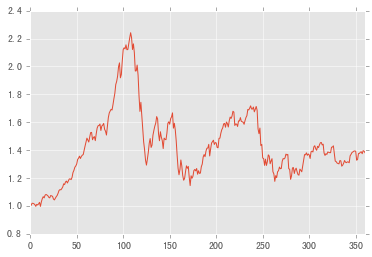

In [30]:
data['净值'].plot()

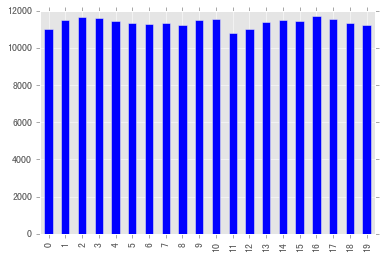

In [33]:
data['深证成指'][:20].plot(kind='bar')

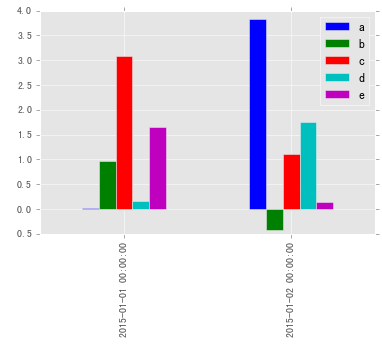

In [35]:
new_df.plot(kind='bar')

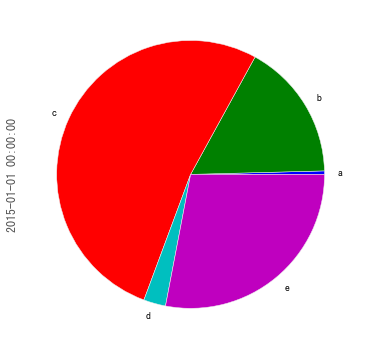

In [51]:
plt.figure(figsize=[6,6])
new_df.loc['2015-01-01'].plot(kind='pie')

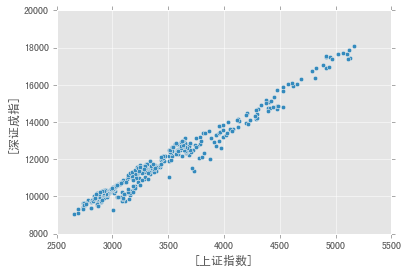

In [54]:
data.plot(kind='scatter', x=['上证指数'],y =['深证成指'])

In [55]:
import seaborn as sns

/home/rainx/miniconda3/envs/finance/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


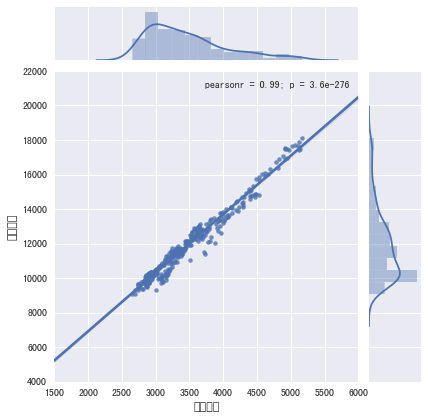

In [58]:
sns.jointplot(data['上证指数'], data['深证成指'], kind='reg')

### 美国西雅图人们使用自行车情况分析与预测（进阶）

http://www.jianshu.com/p/9658d0588e60

http://www.jianshu.com/p/c1a0524267a7